#Image Classification with MNIST Dataset

###The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

###It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

###The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [ ]:
# Importing Libaries
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# Load dataset
from keras.datasets import mnist

In [ ]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
# Shape of the dataset
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
# Reshape of the dataset
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [ ]:
#Convert class vectors to binary class metrics

In [ ]:
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [ ]:
print('X_train.shape', X_test.shape)
print(X_train.shape[0],'Train Sample')
print(X_test.shape[0],'Test Sample')

X_train.shape (10000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


In [ ]:
# Create The Model

In [ ]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
# Model training
model.fit(X_train,y_train , batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))
print("The Model has Successfully Trained")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.2421 - accuracy: 0.9254 - val_loss: 0.0616 - val_accuracy: 0.9812
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0307 - val_accuracy: 0.9906
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0269 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 5s 87us/

In [ ]:
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=2)
print('test loss:',score[0])
print('test accuracy:',score[1])

test loss: 0.024295693566385126
test accuracy: 0.9922000169754028


In [ ]:
# Model Saving
model.save('mnist.model')
print('Saving the model as mnist.h5')

Saving the model as mnist.h5


In [ ]:
# Prediction 

In [ ]:
new_model=load_model('mnist.model')

In [ ]:
prediction=new_model.predict(X_test)

In [ ]:
print(prediction)

[[8.3331474e-11 1.4353562e-09 3.1593352e-08 ... 9.9999988e-01
  1.8827741e-10 1.3965154e-08]
 [2.6270053e-08 2.5850215e-07 9.9999976e-01 ... 1.7577292e-13
  1.4756337e-11 2.2648682e-14]
 [5.9303136e-09 9.9999905e-01 5.0843827e-08 ... 1.1268972e-07
  1.1930294e-07 1.7471360e-09]
 ...
 [3.5915095e-14 2.1507535e-10 1.6785711e-14 ... 1.2009951e-09
  3.3242105e-09 2.3583737e-09]
 [3.4930680e-11 5.5337557e-12 1.9345867e-14 ... 6.3096506e-13
  1.1245549e-05 1.2790273e-11]
 [6.3917622e-09 1.8359909e-10 1.6958214e-08 ... 1.7798674e-13
  1.6924987e-09 1.8950666e-10]]


In [ ]:
print(np.argmax(prediction[5]))

1


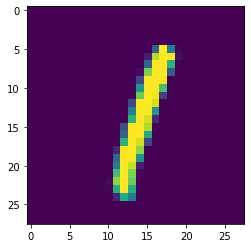

In [ ]:
plt.imshow((tf.squeeze(X_test[5])))
plt.show()

In [ ]:
#predict on the first five images
pred=model.predict(X_test[:5])
# print our model prediction
print(np.argmax(pred ,axis=1))
print(y_test[:5])


[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


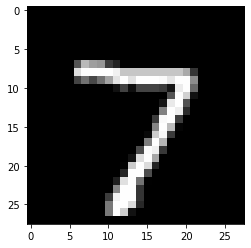

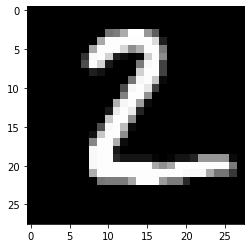

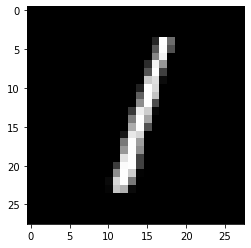

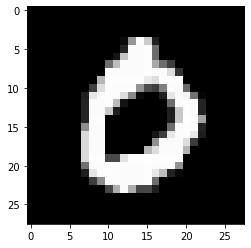

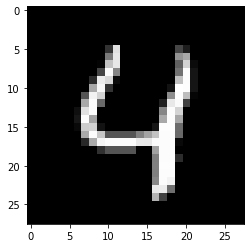

In [ ]:
for i in range (0,5):
  first_img=X_test[i]
  first_img=np.array(first_img,dtype='float')
  pixels=first_img.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()